In [98]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

In [99]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [100]:
df.shape

(918, 12)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [102]:
# Handling non_numerical data
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [103]:
df = handle_non_numerical_data(df)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,2,172,1,0.0,2,0
1,49,0,2,160,180,0,2,156,1,1.0,0,1
2,37,1,0,130,283,0,1,98,1,0.0,2,0
3,48,0,3,138,214,0,2,108,0,1.5,0,1
4,54,1,2,150,195,0,2,122,1,0.0,2,0


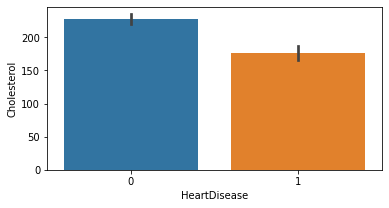

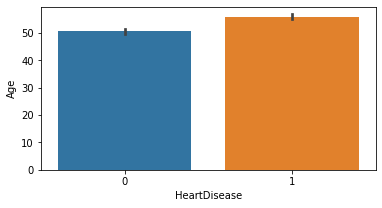

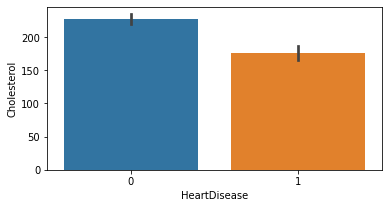

In [104]:
plt.figure(figsize=(6,3))
sns.barplot(x=df["HeartDisease"],y=df["Cholesterol"])
plt.figure(figsize=(6,3))
sns.barplot(x=df["HeartDisease"],y=df["Age"])
plt.figure(figsize=(6,3))
sns.barplot(x=df["HeartDisease"],y=df["Cholesterol"])

In [105]:
my_labels = df.pop("HeartDisease")

In [106]:
train_X,test_X,train_y,test_y = train_test_split(df,my_labels,test_size=0.1,random_state=0)

In [107]:
model = svm.SVC(kernel="linear")
model.fit(train_X,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
score = model.score(test_X,test_y)
print("Accuracy: {}%".format(score*100))

Accuracy: 88.04347826086956%
